This is an IPython notebook. 
- It contains cells which may have text/ code
- Each cell has code which can be run independently from what is run in other cells. 
- Once a cell is run the variables etc are kept and saved and not destroyed from the memory.
- You can run a cell using Shift+Enter
- You can add a cell by using the + icon above
- Try playing around with the cells below it
- Exercise - print 'I'm learning ipython' in a new cell below the a=1 cell.

In [ ]:
print a

In [ ]:
a = 1

# now go back and the run the first cell. 
# To run a cell, click inside the cell and press Shift + Enter

### Install and import all necessary libraries
- pip install python-twitter
- pip install plotly


In [146]:
#from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream
import twitter
import json
import pandas as pd
import base64
import plotly.plotly as py
from plotly.graph_objs import *

### Get access tokens
Access tokens are like user name and password combined in one long string. This string is used to authenticate a user or application accessing a service (twitter in this case).

Twitter uses oAuth which is an open standard for authorization.

**Steps to generate access tokens**
- Open [https://apps.twitter.com/](https://apps.twitter.com/)
- Click “Create New App”
- Fill out the form, agree to the terms, and click “Create your Twitter application”
- Click on “Keys and Access Tokens” tab, and copy your “API key” and “API secret”. 
- Scroll down and click “Create my access token”, and copy your “Access token” and “Access token secret”.
- Access Level -> Read, write, and direct messages (modify app permissions)
- https://apps.twitter.com/app/13519590/keys

*API paremeters*
- [http://socialmedia-class.org/assets/img/raffi-krikorian-map-of-a-tweet.png](http://socialmedia-class.org/assets/img/raffi-krikorian-map-of-a-tweet.png)

In [3]:
# Variables that contains the user credentials to access Twitter API
ACCESS_TOKEN = '113707618-Hcynv2DrvuSs7ZhDd4k3mjW3xrnIQspYqnX9fGZq'
ACCESS_SECRET = '4dEvHrT7l6pIZbegTef8cOxpC3RkyWuOXoJXmGbJrtTXS'
CONSUMER_KEY = 'cLMfRK5UwlxPEKSGtOHpIMCxO'
CONSUMER_SECRET = 'c5fr8Ezh8iTGK2LD8fcMucUl70Tr3lA0rh737UhGVvgCwhB0oP'

### Setup twitter api using python

[python-twiter](https://github.com/bear/python-twitter) is a pure python interface to access Twitter API.
It provides these two classes
- SampleStream - delivers a sample of all tweets
- FilterStream - delivers tweets that match one or more criteria

In [6]:
# Initiate the connection to Twitter Streaming API
#twitter_stream = TwitterStream(auth=oauth)
api = twitter.Api(consumer_key=CONSUMER_KEY,
                  consumer_secret=CONSUMER_SECRET,
                  access_token_key=ACCESS_TOKEN,
                  access_token_secret=ACCESS_SECRET)
print(api.VerifyCredentials())

{"created_at": "Fri Feb 12 19:20:03 +0000 2010", "default_profile": true, "default_profile_image": true, "favourites_count": 138, "followers_count": 29, "friends_count": 2, "id": 113707618, "lang": "en", "name": "Gursimran singh", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_3_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "screen_name": "simari3r", "status": {"created_at": "Mon Apr 16 07:04:49 +0000 2012", "id": 191784191468388352, "id_str": "191784191468388352", "lang": "en", "source": "<a href=\"https://dev.twitter.com/docs/tfw\" rel=\"nofollow\">Twitter for Websites</a>", "text": "Check out this awesome innovation! http://t.co/XLlZs0KP #accenture #innovationjockeys #yahoo #india"}, "statuses_count": 2}


### Twitter Python API twitter-python

- Detailed documentation [link](https://python-twitter.readthedocs.io/)
- Twitter API documenttaion [link](https://dev.twitter.com/overview/api)

**Things you can do with the API**
- Get list of friends
- Post an update on your account
- Fetch all tweets of any user on your friend list

In [7]:
# Get list of friends
users = api.GetFriends()
print([u.name for u in users])

[u'Dave Gershgorn', u'TUSSAT']


In [ ]:
#Post an update on twitter
status = api.PostUpdate('#MLIndia')

In [12]:
# Print tweets for a given user
user = users[0]
print 'Printing tweets for user ' + str(user.name)
statuses = api.GetUserTimeline(screen_name=user)
print([s.text for s in statuses])

Printing tweets for user Dave Gershgorn


[u'Check out this awesome innovation! http://t.co/XLlZs0KP #accenture #innovationjockeys #yahoo #india', u'Check out this awesome innovation! http://t.co/XLlZs0KP #accenture #innovationjockeys #yahoo #india']


### What else you can do with the library

Some of methods include
- GetStreamFilter - Returns a filtered view of public statuses.
- GetStreamSample - Returns a small sample of public statuses.
- GetTrendsCurrent - Get the current top trending topics (global)
- GetUserTimeline(user) - Fetch the sequence of public Status messages for a single user.
- GetHomeTimeline() - Fetch a collection of the most recent Tweets and retweets posted by the authenticating user and the users they follow.
- GetFavorites - Return a list of Status objects representing favorited tweets.
- GetHomeTimeline - Fetch a collection of the most recent Tweets and retweets posted by the authenticating user and the users they follow.
- GetSearch - Return twitter search results for a given term. You must specify one of term, geocode, or raw_query.
- GetTrendsWoeid - Return the top 10 trending topics for a specific WOEID, if trending information is available for it.

Read this detailed list of mtheods here [link](https://python-twitter.readthedocs.io/en/latest/twitter.html#module-twitter.api)

In [13]:
# fetch the home timeline
print api.GetHomeTimeline()

[Status(ID=842732571091984384, ScreenName=davegershgorn, Created=Fri Mar 17 13:41:16 +0000 2017, Text=u"Silicon Valley's open-source experiment is working: Meet the West Virginia teen who's teaching himself to build AI \n\nhttps://t.co/PuuVQ5GFHI"), Status(ID=842731589989752835, ScreenName=davegershgorn, Created=Fri Mar 17 13:37:22 +0000 2017, Text=u'RT @alicetruong: Michael Murphy.'), Status(ID=842701309908258817, ScreenName=davegershgorn, Created=Fri Mar 17 11:37:03 +0000 2017, Text=u'this is more a critique of tech journalism than deepmind https://t.co/ohHtiQt2n6'), Status(ID=842701232972206084, ScreenName=davegershgorn, Created=Fri Mar 17 11:36:45 +0000 2017, Text=u"the conceit of every tech journalist is that the person/company they're profiling is different. it's rarely true. https://t.co/tmprsjJTJg"), Status(ID=842694674133520384, ScreenName=davegershgorn, Created=Fri Mar 17 11:10:41 +0000 2017, Text=u'looks more like Neapolitan to me! https://t.co/iwt4zUMufx'), Status(ID=842566

### Analyze the final stats
- Get the number of positive/ neutral and negative tweets
- Draw bar chart and analyze the numbers

### Install the libraries required for sentiment analysis
- pip install textblob
- python -m textblob.download_corpora

TextBlob is actually a high level library built over top of NLTK library. First we call clean_tweet method to remove links, special characters, etc. from the tweet using some simple regex.
Then, as we pass tweet to create a TextBlob object, following processing is done over text by textblob library:

Tokenize the tweet ,i.e split words from body of text.
Remove stopwords from the tokens.(stopwords are the commonly used words which are irrelevant in text analysis like I, am, you, are, etc.)
Do POS( part of speech) tagging of the tokens and select only significant features/tokens like adjectives, adverbs, etc.
Pass the tokens to a sentiment classifier which classifies the tweet sentiment as positive, negative or neutral by assigning it a polarity between -1.0 to 1.0 .
Here is how sentiment classifier is created:

TextBlob uses a Movies Reviews dataset in which reviews have already been labelled as positive or negative.
Positive and negative features are extracted from each positive and negative review respectively.
Training data now consists of labelled positive and negative features. This data is trained on a Naive Bayes Classifier.
Then, we use sentiment.polarity method of TextBlob class to get the polarity of tweet between -1 to 1.
Then, we classify polarity as:
- positive
- negative
- neutral

In [132]:
import re
from textblob import TextBlob

def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
    
def get_min_max(tweets):
    ids = []
    for tweet in tweets:
        # print tweet
        if type(tweet) is list:
            tweet = tweet[0]
        ids.append(tweet.id)
    min_id = min(ids)
    max_id = max(ids)
    return min_id, max_id
    
def get_tweets(term, count):
    all_tweets = []
    max_id = 843567375765159939000000
    #print max_id
    loop_count = count / 100
    for i in range(loop_count):
        tweets = api.GetSearch(term=term, count = 100)
        #print 'Total number of tweets found - '  +  str(len(tweets))
        try:
            min_id, max_id = get_min_max(tweets)
            all_tweets = all_tweets + tweets
        except:
            print 'something wrong'
            pass
    return all_tweets
  

def get_tweets_df(tweets):
    result = []
    for tweet in tweets:
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        source = tweet.source
        text = tweet.text
        urls = tweet.urls
        sentiment = get_tweet_sentiment(text)
        
        result.append({
            #'text': base64.b64encode(text.encode('ascii', 'ignore').decode('ascii')),
            'text': text.encode('ascii', 'ignore').decode('ascii'),
            'sentiment': sentiment,
            'favorite_count' : favorite_count,
            'source' : source,
            'retweet_count' : retweet_count,
            'user_fav_count': tweet.user.favourites_count,
            'user_follower_count': tweet.user.followers_count,
            'user_friends_count': tweet.user.friends_count,
            'user_screen_name' : tweet.user.screen_name.encode('ascii', 'ignore').decode('ascii'),
            'user_name': tweet.user.name.encode('ascii', 'ignore').decode('ascii'),
            'user_url': tweet.user.url
        })
    result_df = pd.DataFrame(result)
    return result_df

def print_tweet(tweet):
    print '---- Printing tweet ----'
    print tweet.favorite_count
    print tweet.text
    print ' --------- x --------- '

### Fetch tweets for different political personalities

In [180]:
print 'Fetching tweets for Yogi'
tweets_yogi = get_tweets('Yogi Adityanath', 1000)
print 'Total number of tweets fetched = ' + str(len(tweets))

print 'Fetching tweets for NAMO'
tweets_namo = get_tweets('Narendra Modi', 1000)
print 'Total number of tweets fetched = ' + str(len(tweets))

print 'Fetching tweets for AK'
tweets_ak = get_tweets('Arvind Kejriwal', 1000)
print 'Total number of tweets fetched = ' + str(len(tweets))

print 'Fetching tweets for RG'
tweets_rg = get_tweets('Rahul Gandhi', 1000)
print 'Total number of tweets fetched = ' + str(len(tweets))
#print tweets

Fetching tweets for Yogi


Total number of tweets fetched = 200
Fetching tweets for NAMO


Total number of tweets fetched = 200
Fetching tweets for AK


Total number of tweets fetched = 200
Fetching tweets for RG


Total number of tweets fetched = 200


### Convert dicts into pandas data frame

In [133]:
df_yogi = get_tweets_df(tweets_yogi)
df_namo = get_tweets_df(tweets_namo)
df_ak = get_tweets_df(tweets_ak)
df_rg = get_tweets_df(tweets_rg)

df_yogi.to_csv('yogi.csv')
df_namo.to_csv('namo.csv')
df_ak.to_csv('ak.csv')
df_rg.to_csv('rg.csv')

In [142]:
# Visualize some tweets
print 'Yogi Adityanath positive tweets'
print df_yogi[df_yogi['sentiment'] == 'positive']['text'].head()

print 'Yogi Adityanath negative tweets'
print df_yogi[df_yogi['sentiment'] == 'negative']['text'].head()

Yogi Adityanath positive tweets
0     Congratulations to Yogi Adityanath Ji, Keshav ...
1     Yogi Adityanath as CM is the best answer to UP...
3     RT @sona_insan: Many Many Congratulations to U...
20    RT @RahulKajal3: Profile of the new CM of UP. ...
22    RT @bhs7rocks: First ministers , now bureaucra...
Name: text, dtype: object
Yogi Adityanath negative tweets
19     RT @Ish_Bhandari: Remember when tough, bold ch...
82     RT @Aneela_7: You know what sickens me 2 d cor...
103    RT @Ish_Bhandari: Remember when tough, bold ch...
105    RT @f_azhar87: @yogi_adityanath @CMOfficeUP  p...
122    RT @Ish_Bhandari: Remember when tough, bold ch...
Name: text, dtype: object


### Analyze the final stats
- Get the number of positive/ neutral and negative tweets
- Draw bar chart and analyze the numbers

           YOGI  NAMO   AK   RG
sentiment                      
negative     58    99  290  251
neutral     753   631  530  643
positive    189   270  180  106


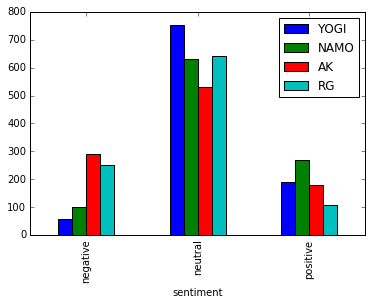

In [179]:
sentiment_yogi = df_yogi.groupby(['sentiment'])[['sentiment']].count()
sentiment_yogi.rename(columns={'sentiment': 'YOGI'}, inplace=True)

sentiment_namo = df_namo.groupby(['sentiment'])[['sentiment']].count()
sentiment_namo.rename(columns={'sentiment': 'NAMO'}, inplace=True)

sentiment_ak = df_ak.groupby(['sentiment'])[['sentiment']].count()
sentiment_ak.rename(columns={'sentiment': 'AK'}, inplace=True)

sentiment_rg = df_rg.groupby(['sentiment'])[['sentiment']].count()
sentiment_rg.rename(columns={'sentiment': 'RG'}, inplace=True)

#Concatenate the results df
stats = pd.concat([sentiment_yogi, sentiment_namo, sentiment_ak, 
                   sentiment_rg] ,axis=1, join='inner')
print stats
stats.plot(kind='bar')

### Next steps
- Analyze the data in excel
- Remove redundant tweets/ retweets (count them only once)
- Since its the users who are politically inclined, we can instead analyze users
- What else, look at data and figure out